In [22]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [23]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [24]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [25]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [26]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [27]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [28]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [29]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [30]:
# Find the most recent date in the data set.
rct_date = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]
rct_date

'2017-08-23'

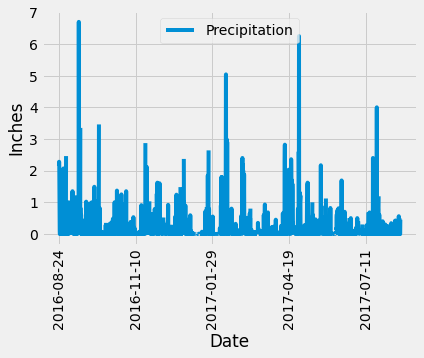

In [39]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

year_to_date = dt.datetime.strptime(rct_date,'%Y-%m-%d') - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
rain_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= year_to_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
rain_data_df = pd.DataFrame(rain_data).set_index('date')

rain_data_df.rename(columns={'prcp': 'Precipitation'}, inplace=True)

# Sort the dataframe by date


rain_data_df = rain_data_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data

rain_data_df.plot(rot=90)

plt.xlabel("Date")
plt.ylabel("Inches")

plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# pd.DataFrame(rain_data_df['prcp'].agg(['mean','median','var','std','sem']))
rain_data_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
session.query(measurement.station).distinct().count()

9

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

min_tobs = session.query(func.min(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').scalar()

max_tobs = session.query(func.max(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').scalar()

avg_tobs = session.query(func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').scalar()

print(f"the minimum temperature observed at station USC00519281 is {min_tobs} deg F")
print(f"the maximum temperature observed at station USC00519281 is {max_tobs} deg F")
print(f"the average temperature observed at station USC00519281 is {round(avg_tobs,1)} deg F")

the minimum temperature observed at station USC00519281 is 54.0 deg F
the maximum temperature observed at station USC00519281 is 85.0 deg F
the average temperature observed at station USC00519281 is 71.7 deg F


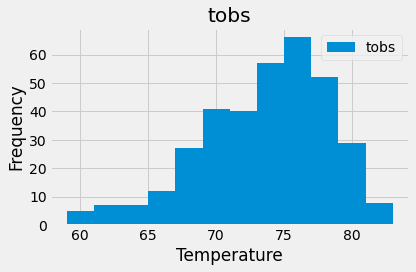

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_year = session.query(measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    filter(measurement.date >= year_to_date).all()

temp_year_df = pd.DataFrame(temp_year)

temp_year_df.hist(bins=12, label="tobs")
plt.legend()
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.tight_layout()


# Close session

In [22]:
# Close Session
session.close()